# Exploratory Data Analysis

### Data Loading

In [1587]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd             
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Spotify dataset into a pandas DataFrame, specifying the encoding to handle special characters
spotify_data = pd.read_csv('spotify-2023.csv', encoding='latin1')

# Display the first few rows of the loaded dataset to quickly inspect its structure and contents
display(spotify_data)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### Overview of Dataset

- How many rows and columns does the dataset contain?
- What are the data types of each column? Are there any missing values?

In [1589]:
# Retrieve the number of rows and columns in the dataset to understand its size
num_rows, num_columns = spotify_data.shape

# Display the dataset dimensions in a user-friendly message format
print(f"The dataset contains {num_rows} rows and {num_columns} columns.\n")

# Print the data type of each column, which helps identify the type of data stored and informs potential transformations
print("Data types of each column:")
print(spotify_data.dtypes)
print("\n")

# Check for missing values in each column and count them, giving insights into data completeness
missing_values = spotify_data.isnull().sum()

# Display columns that have missing values and their respective counts, if any
print("Columns with missing values and their counts:")
print(missing_values[missing_values > 0])

The dataset contains 953 rows and 24 columns.

Data types of each column:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


Columns with missing values and their counts:
in_shazam_charts    50
key                 95
dtype: int64


### Data Cleaning

In [1591]:
import pandas as pd

# Define the columns expected to have numerical data for conversion and cleaning
numeric_columns = [
    'artist_count', 'released_year', 'released_month', 'released_day', 
    'in_spotify_playlists', 'in_spotify_charts', 'streams', 
    'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 
    'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 
    'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 
    'liveness_%', 'speechiness_%'
]

# Define the columns expected to contain string data
string_columns = ['track_name', 'artist(s)_name', 'key', 'mode']

# Convert numeric columns to numeric data types, coercing errors to NaN
spotify_data[numeric_columns] = spotify_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill NaN values in numeric columns with 0 to handle missing data
spotify_data[numeric_columns] = spotify_data[numeric_columns].fillna(0)

# Fill NaN values in string columns with 'unknown' to handle missing textual data
spotify_data[string_columns] = spotify_data[string_columns].fillna('unknown')

# Convert numeric columns to integers after handling missing values
spotify_data[numeric_columns] = spotify_data[numeric_columns].astype(int)

# Remove any duplicate rows from the dataset to ensure data uniqueness
spotify_data.drop_duplicates(inplace=True)

# Convert 'released_month' to numeric and map month numbers to names
spotify_data['released_month'] = pd.to_numeric(spotify_data['released_month'], errors='coerce')
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
               5: 'May', 6: 'June', 7: 'July', 8: 'August',
               9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Map month numbers to names, defaulting to 'unknown' for invalid months
spotify_data['released_month'] = spotify_data['released_month'].map(month_names).fillna('unknown')

# Check if any missing values remain after cleaning
remaining_missing = spotify_data.isnull().sum()
if remaining_missing.sum() == 0:
    print("Remaining missing values after cleaning: None")
else:
    print("Remaining missing values after cleaning:")
    print(remaining_missing[remaining_missing > 0])

# Display the data types of each column after cleaning, confirming consistency
print("\nData types after cleaning:")
print(spotify_data.dtypes)
print("\n")

# Save the cleaned dataset to a new CSV file, confirming successful data cleaning and export
cleaned_file_path = 'spotify-2023-cleaned.csv'
spotify_data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}.")

Remaining missing values after cleaning: None

Data types after cleaning:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month          object
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


Cleaned data saved to spotify-2023-cleaned.csv.


### Basic Descriptive Statistics

- What are the mean, median, and standard deviation of the streams column?
- What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?


Streams Summary Statistics
Mean: 513,597,931.31
Median: 290,228,626.00
Standard Deviation: 566,803,887.06



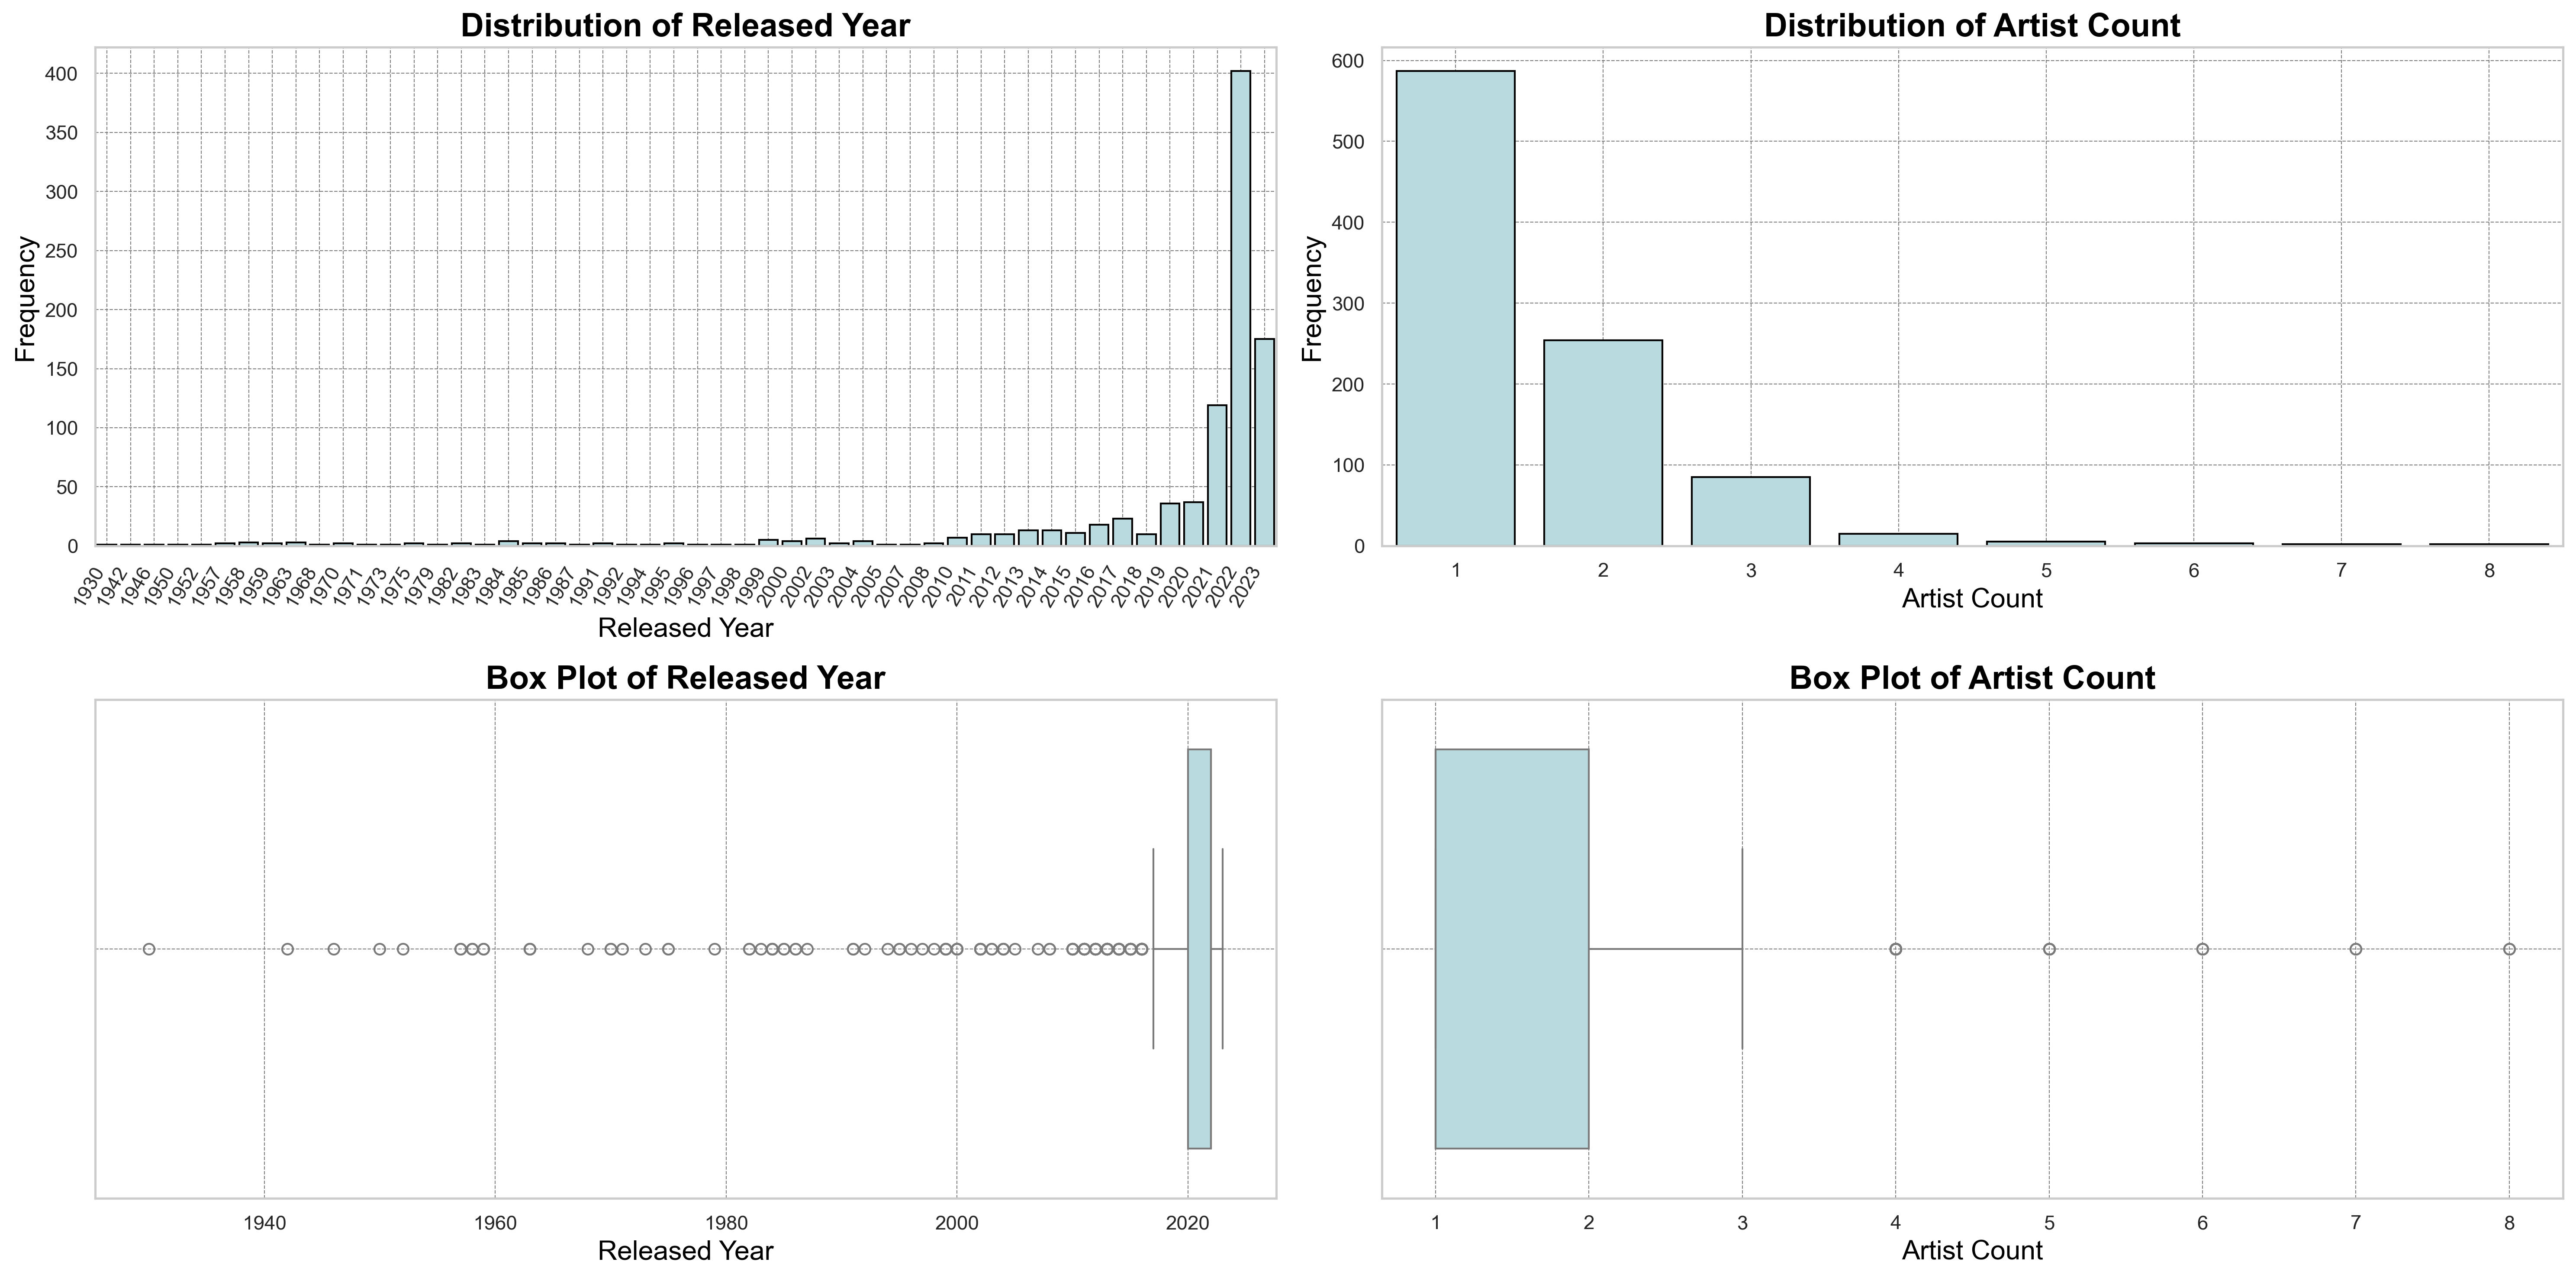

Outliers for Released Year:
[1930, 1942, 1946, 1950, 1952, 1957, 1958, 1959, 1963, 1968, 1970, 1971, 1973, 1975, 1979, 1982, 1983, 1984, 1985, 1986, 1987, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

Outliers for Artist Count:
[4, 5, 6, 7, 8]


In [1571]:
# Load the cleaned Spotify dataset
spotify_data_cleaned = pd.read_csv('spotify-2023-cleaned.csv', encoding='latin1')

# Calculate summary statistics for 'streams' column (mean, median, std)
streams_mean = spotify_data_cleaned['streams'].mean()
streams_median = spotify_data_cleaned['streams'].median()
streams_std = spotify_data_cleaned['streams'].std()

# Display the summary statistics
print("\nStreams Summary Statistics")
print(f"Mean: {streams_mean:,.2f}")
print(f"Median: {streams_median:,.2f}")
print(f"Standard Deviation: {streams_std:,.2f}\n")

# Define a pastel color for consistency in plots
pastel_color = '#B2E0E6'

# Create a 2x2 grid of subplots with high resolution for clear visualization
fig, axs = plt.subplots(2, 2, figsize=(20, 10), dpi=300)

# Plot distribution of released years using a barplot
released_year_counts = spotify_data_cleaned['released_year'].value_counts().sort_index()
sns.barplot(x=released_year_counts.index, y=released_year_counts.values, ax=axs[0, 0], color=pastel_color, edgecolor='black')
axs[0, 0].set_title("Distribution of Released Year", fontsize=18, fontweight='semibold', color='#000000')
axs[0, 0].set_xlabel('Released Year', fontsize=15, color='#000000')
axs[0, 0].set_ylabel('Frequency', fontsize=15, color='#000000')
axs[0, 0].set_xticks(range(len(released_year_counts.index)))
axs[0, 0].set_xticklabels(released_year_counts.index, rotation=60, ha='right')
axs[0, 0].grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

# Plot distribution of artist counts using a barplot
artist_count_counts = spotify_data_cleaned['artist_count'].value_counts().sort_index()
sns.barplot(x=artist_count_counts.index, y=artist_count_counts.values, ax=axs[0, 1], color=pastel_color, edgecolor='black')
axs[0, 1].set_title("Distribution of Artist Count", fontsize=18, fontweight='semibold', color='#000000')
axs[0, 1].set_xlabel('Artist Count', fontsize=15, color='#000000')
axs[0, 1].set_ylabel('Frequency', fontsize=15, color='#000000')
axs[0, 1].grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

# Plot boxplot for 'released_year' to identify the spread of data
sns.boxplot(data=spotify_data_cleaned, x='released_year', color=pastel_color, ax=axs[1, 0])
axs[1, 0].set_title('Box Plot of Released Year', fontsize=18, fontweight='semibold', color='#000000')
axs[1, 0].set_xlabel('Released Year', fontsize=15, color='#000000')
axs[1, 0].grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

# Plot boxplot for 'artist_count' to identify the spread of data
sns.boxplot(data=spotify_data_cleaned, x='artist_count', color=pastel_color, ax=axs[1, 1])
axs[1, 1].set_title('Box Plot of Artist Count', fontsize=18, fontweight='semibold', color='#000000')
axs[1, 1].set_xlabel('Artist Count', fontsize=15, color='#000000')
axs[1, 1].grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()

# Function to calculate outliers based on the IQR method
def calculate_outliers(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers as values outside the bounds
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Return the unique outliers as a sorted list
    return sorted(outliers[column].unique().tolist())

# Calculate outliers for 'released_year' and 'artist_count'
unique_year_outliers = calculate_outliers(spotify_data_cleaned, 'released_year')
unique_artist_outliers = calculate_outliers(spotify_data_cleaned, 'artist_count')

# Print the identified outliers for both columns
print(f'Outliers for Released Year:')
print(unique_year_outliers)
print(f'\nOutliers for Artist Count:')
print(unique_artist_outliers)

### Top Performers

- Which track has the highest number of streams? Display the top 5 most streamed tracks.
- Who are the top 5 most frequent artists based on the number of tracks in the dataset?

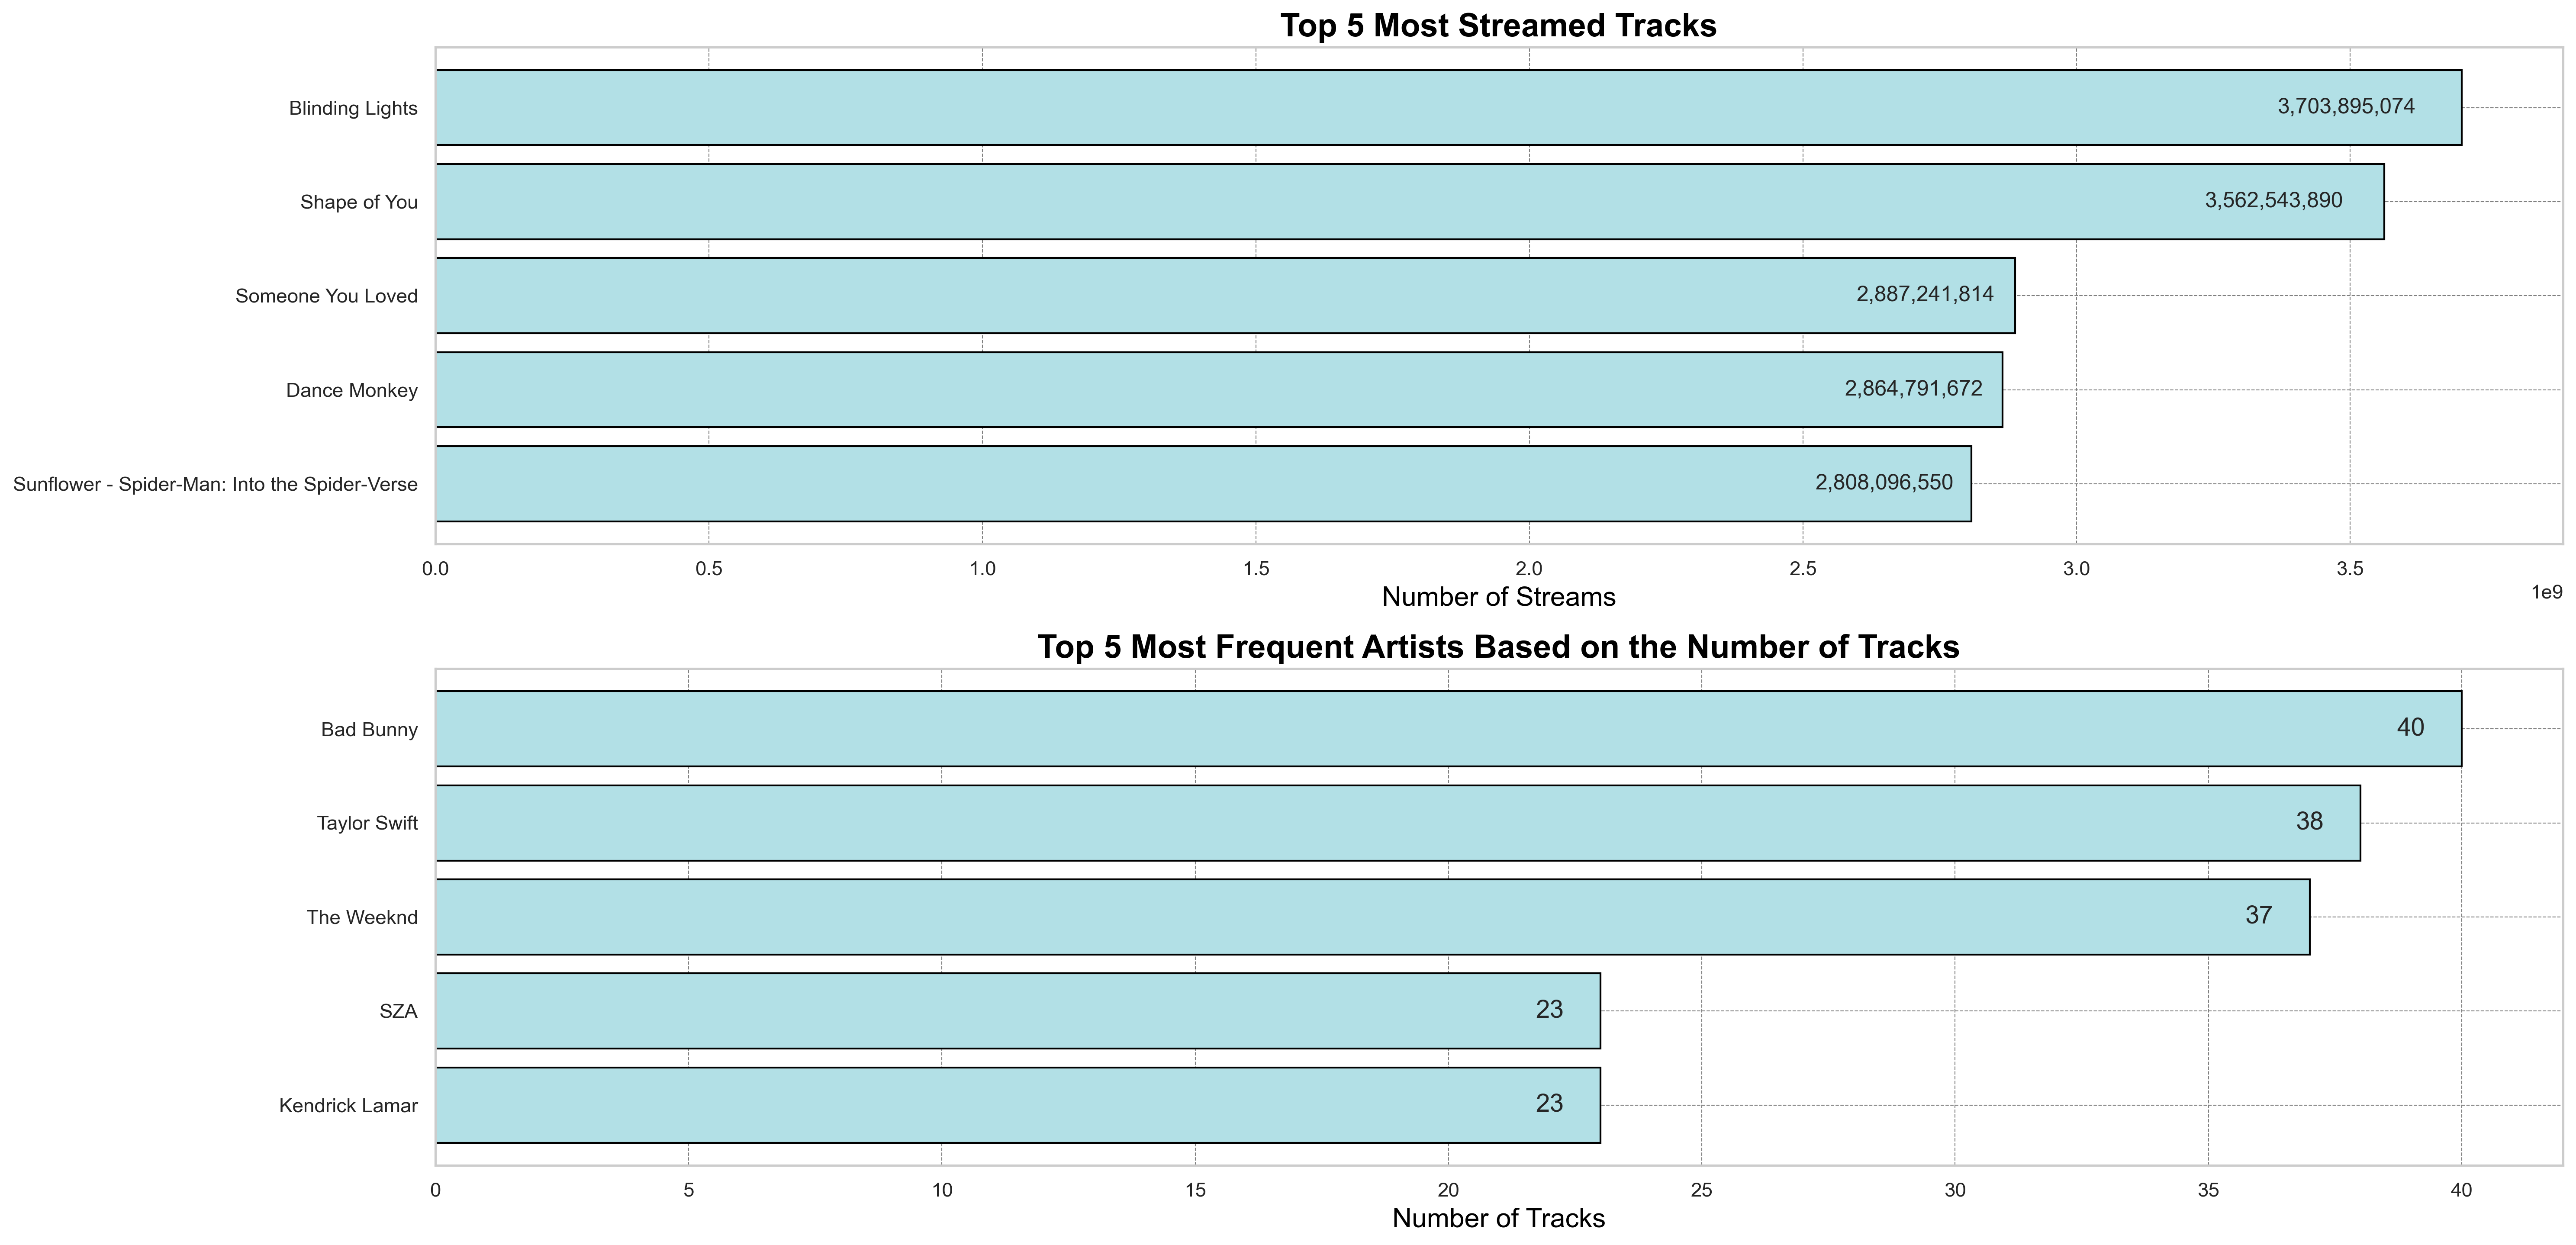

In [1593]:
# Split the 'artist(s)_name' column by commas and explode it to get each artist as a separate row
artists_expanded = spotify_data_cleaned['artist(s)_name'].str.split(',').explode().str.strip()

# Get the top 5 most frequent artists based on the count of their appearances
top_artists = artists_expanded.value_counts().nlargest(5)

# Convert the top artists series into a DataFrame for better readability in the plot
top_artists_df = top_artists.reset_index().rename(columns={'index': 'artist(s)_name', 0: 'track_count'})

# Set up a 2-row subplot with large figure size for better visibility and high resolution
fig, axs = plt.subplots(2, 1, figsize=(20, 9.75), dpi=300)

# Plot a horizontal bar chart for the top 5 most streamed tracks
axs[0].barh(top_streamed_tracks['track_name'], top_streamed_tracks['streams'], color=pastel_color, edgecolor='black')
axs[0].set_title('Top 5 Most Streamed Tracks', fontsize=18, fontweight='semibold', color='#000000')
axs[0].set_xlabel('Number of Streams', fontsize=15, color='#000000')
axs[0].invert_yaxis()  # Invert y-axis to show the highest streams at the top
axs[0].grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

# Add stream count labels on each bar for clarity
for i, bar in enumerate(axs[0].patches):
    axs[0].text(bar.get_width() / 1.06, bar.get_y() + bar.get_height() / 2, 
                f'{int(bar.get_width()):,}', va='center', ha='center', fontsize=12)

# Plot a horizontal bar chart for the top 5 most frequent artists based on the number of tracks
axs[1].barh(top_artists_df['artist(s)_name'], top_artists_df['count'], color=pastel_color, edgecolor='black')
axs[1].set_title('Top 5 Most Frequent Artists Based on the Number of Tracks', fontsize=18, fontweight='semibold', color='#000000')
axs[1].set_xlabel('Number of Tracks', fontsize=15, color='#000000')
axs[1].invert_yaxis()  # Invert y-axis to show the highest track counts at the top
axs[1].grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

# Add track count labels on each bar for clarity
for i, bar in enumerate(axs[1].patches):
    axs[1].text(bar.get_width() - 1, bar.get_y() + bar.get_height() / 2, 
                f'{int(bar.get_width()):,}', va='center', ha='center', fontsize=14)

# Adjust layout to ensure that labels and titles are not overlapping
plt.tight_layout()
plt.show()

### Temporal Trends

- Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
- Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

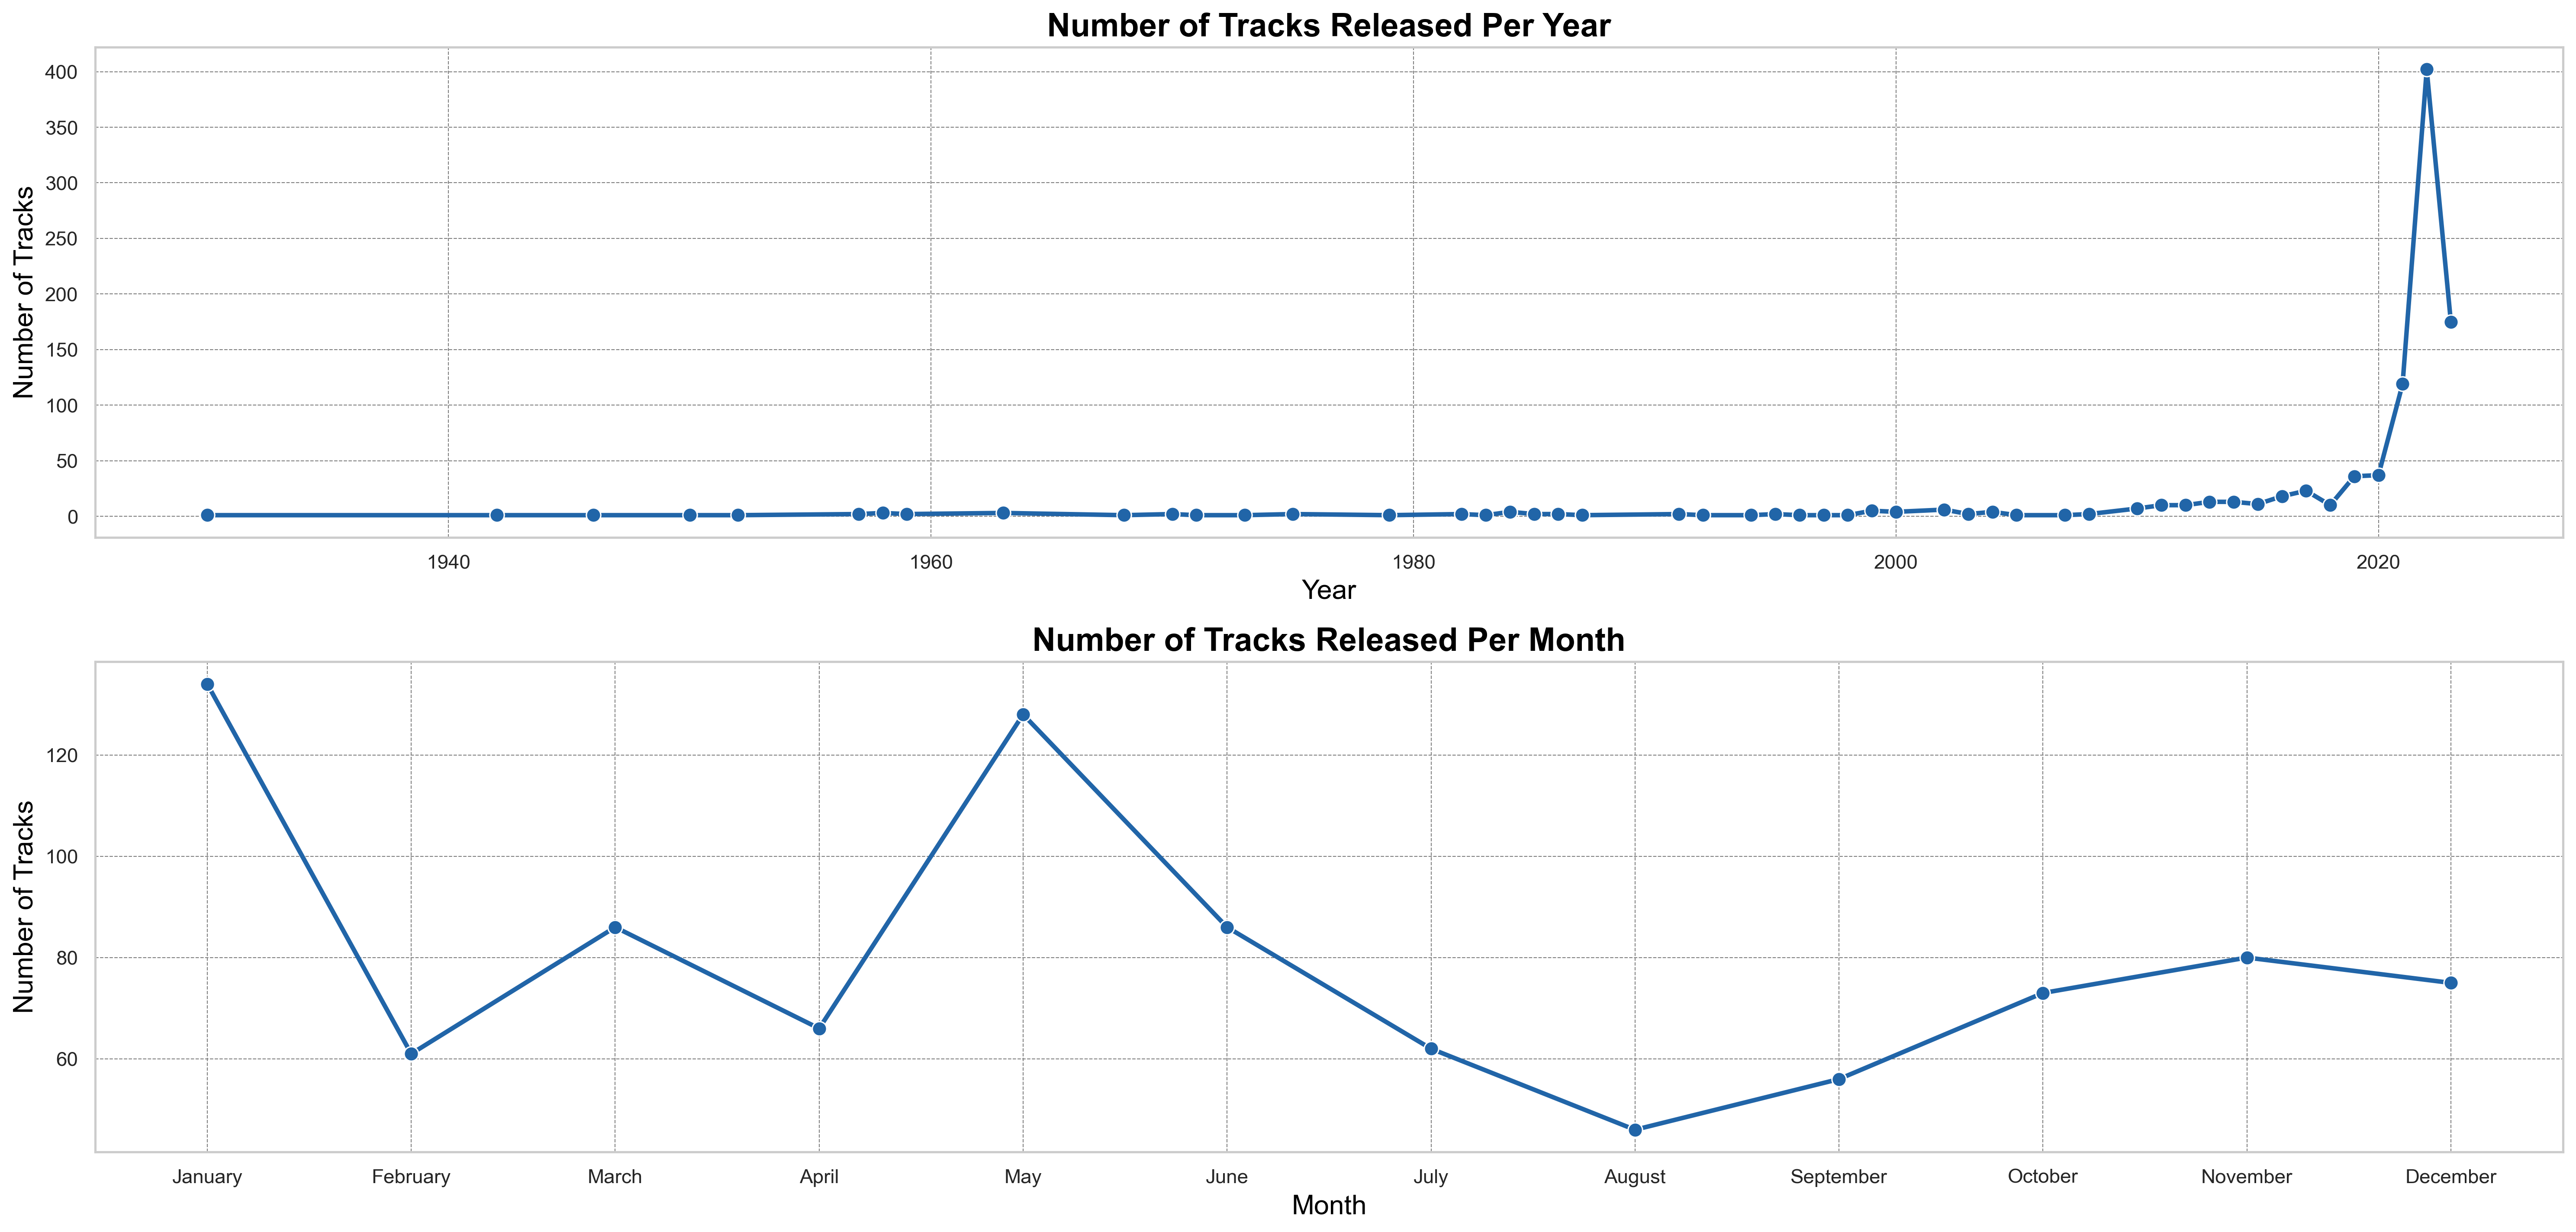

In [1575]:
# Create a 2-row subplot with a large figure size for clear visibility and high resolution
fig, axes = plt.subplots(2, 1, figsize=(20, 9.65), dpi=300)

# Get the count of tracks per year, sorted in chronological order
tracks_per_year = spotify_data_cleaned['released_year'].value_counts().sort_index()

# Plot the number of tracks released per year
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker='o', linewidth=2.5, markersize=8, color='#2165A8', ax=axes[0])
axes[0].set_title("Number of Tracks Released Per Year", fontsize=18, fontweight='semibold', color='#000000')
axes[0].set_xlabel("Year", fontsize=15, color='#000000')
axes[0].set_ylabel("Number of Tracks", fontsize=15, color='#000000')
axes[0].grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

# Get the count of tracks released per month, ensuring the months are in the correct order
tracks_per_month = spotify_data_cleaned['released_month'].value_counts().reindex(month_names.values()).fillna(0)

# Plot the number of tracks released per month
sns.lineplot(x=tracks_per_month.index, y=tracks_per_month.values, marker='o', linewidth=2.5, markersize=8, color='#2165A8', ax=axes[1])
axes[1].set_title("Number of Tracks Released Per Month", fontsize=18, fontweight='semibold', color='#000000')
axes[1].set_xlabel("Month", fontsize=15, color='#000000')
axes[1].set_ylabel("Number of Tracks", fontsize=15, color='#000000')
axes[1].grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()
plt.show()

### Genre and Music Characteristics

- Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
- Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

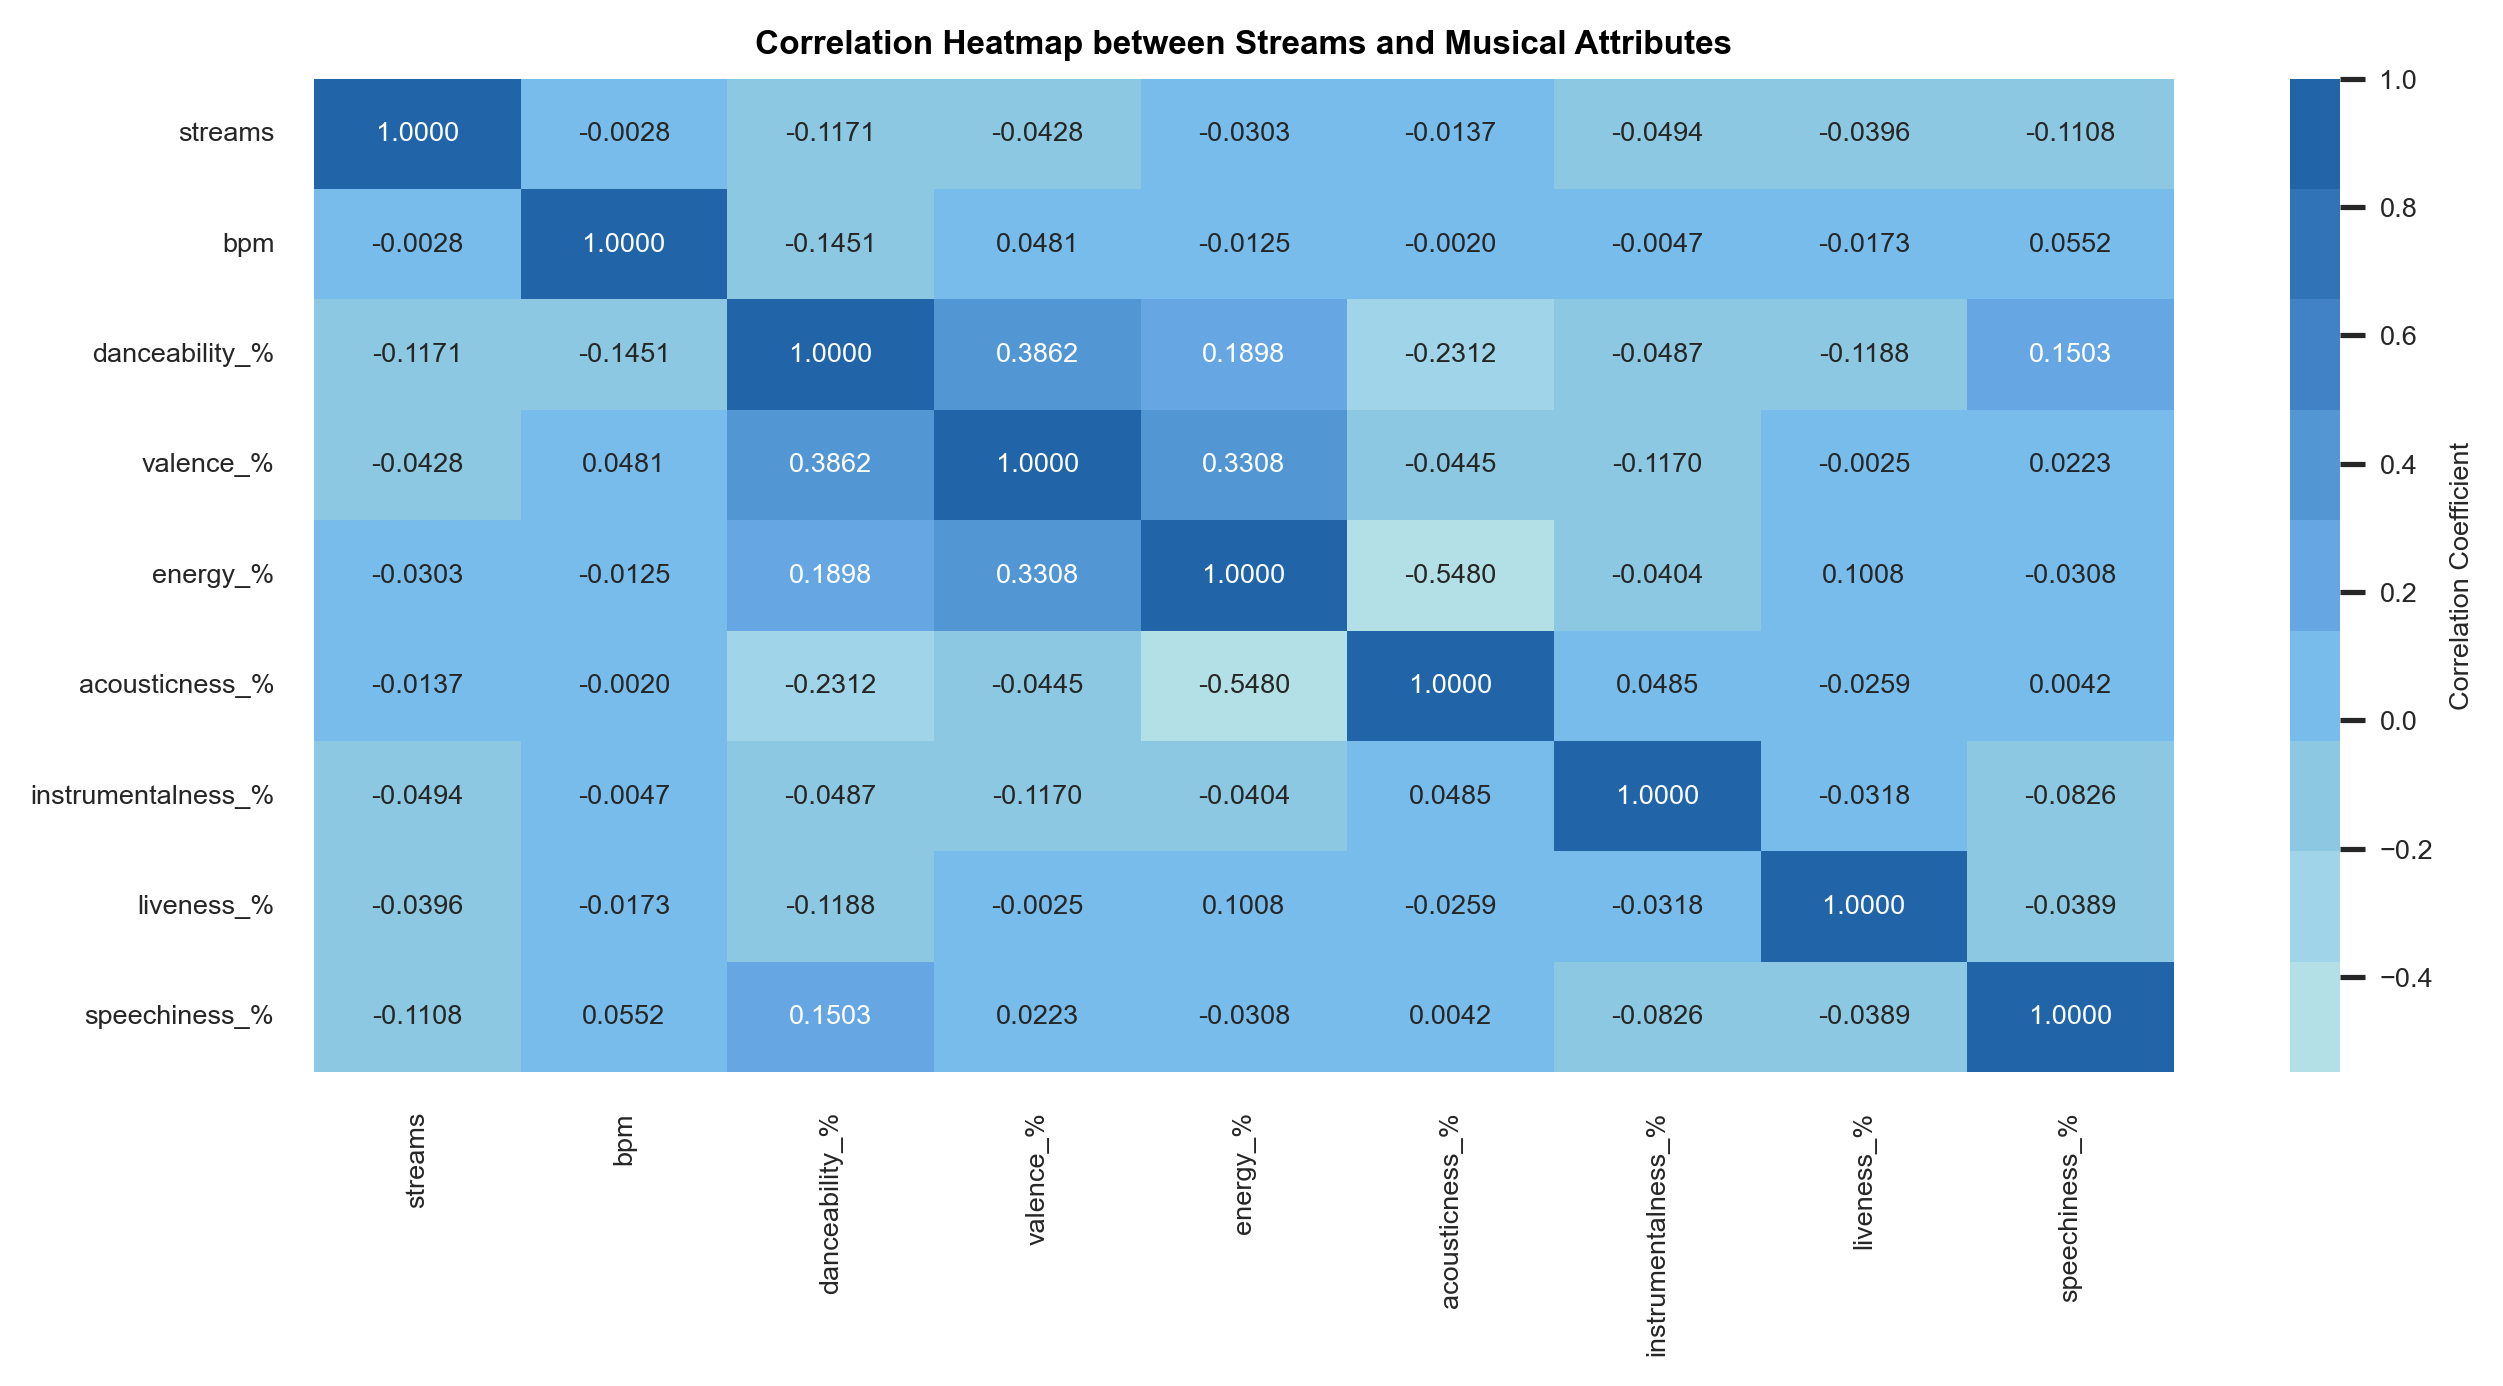

In [1597]:
# List of musical attributes to analyze correlation between
musical_attributes = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 
                      'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Filtered dataset containing only the musical attributes for correlation analysis
spotify_data_filtered = spotify_data_cleaned[musical_attributes]

# Generate the correlation matrix for the selected musical attributes
correlation_matrix = spotify_data_filtered.corr()

# Define a custom blue color palette for the heatmap
blue_palette = ["#B2E0E6", "#A0D4E8", "#8CC8E1", "#78BCEB", "#66A7E3",
                "#5296D4", "#4181C6", "#3173B7", "#2165A8"]

# Create the heatmap figure with specified size and high resolution for clarity
plt.figure(figsize=(10, 4.3), dpi=300)

# Plot the heatmap using seaborn, with annotations for the correlation values
ax = sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(blue_palette, as_cmap=True), 
                 fmt=".4f", square=False, cbar_kws={'label': 'Correlation Coefficient'},
                 annot_kws={'size': 6.5})  

# Set the plot title and format the axes' labels for better readability
plt.title("Correlation Heatmap between Streams and Musical Attributes", fontsize=8, fontweight='semibold', color='#000000')
plt.xticks(fontsize=6.5)
plt.yticks(fontsize=6.5)

# Customize the colorbar label font size
colorbar = ax.collections[0].colorbar  
colorbar.set_label('Correlation Coefficient', fontsize=6.5)
colorbar.ax.tick_params(labelsize=6.5)

# Display the plot
plt.show()

### Platform Popularity

- How do the numbers of tracks in spotify_playlists, deezer_playlists, and apple_playlists compare? Which platform seems to favor the most popular tracks?

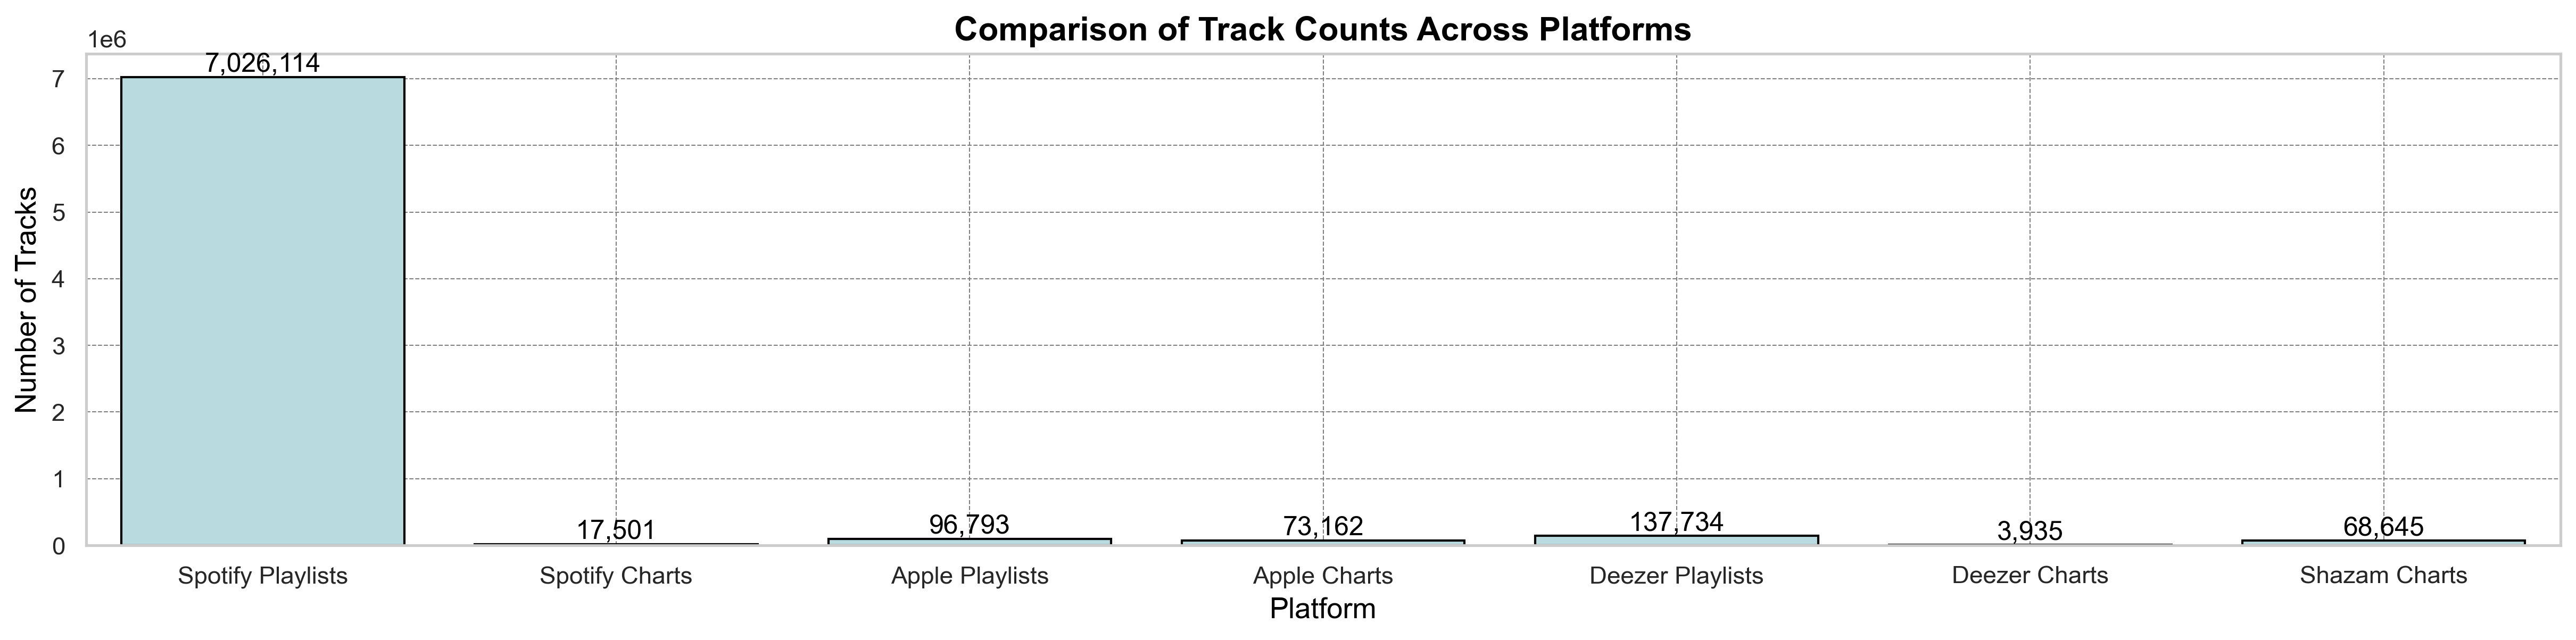

In [1603]:
# Create a dictionary to store the sum of track counts for each platform category
platform_counts = {'Spotify Playlists': spotify_data_cleaned['in_spotify_playlists'].sum(),
                   'Spotify Charts': spotify_data_cleaned['in_spotify_charts'].sum(),
                   'Apple Playlists': spotify_data_cleaned['in_apple_playlists'].sum(),
                   'Apple Charts': spotify_data_cleaned['in_apple_charts'].sum(),
                   'Deezer Playlists': spotify_data_cleaned['in_deezer_playlists'].sum(),
                   'Deezer Charts': spotify_data_cleaned['in_deezer_charts'].sum(),
                   'Shazam Charts': spotify_data_cleaned['in_shazam_charts'].sum(),}

# Initialize a figure for the bar plot with specified size and resolution
plt.figure(figsize=(20, 4), dpi=300)

# Create a bar plot showing the number of tracks on each platform or chart
bars = sns.barplot(x=list(platform_counts.keys()), y=list(platform_counts.values()), color=pastel_color, edgecolor='black')

# Set the title and axis labels with formatting for readability
plt.title("Comparison of Track Counts Across Platforms", fontsize=15, fontweight='semibold', color='#000000')
plt.xlabel("Platform", fontsize=13, color='#000000')
plt.ylabel("Number of Tracks", fontsize=13, color='#000000')
plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

# Annotate each bar with the exact count above it for clarity
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height()):,}', 
             ha='center', va='bottom', fontsize=12, color='#000000')

# Display the plot
plt.show()

### Advanced Analysis

- Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
- Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

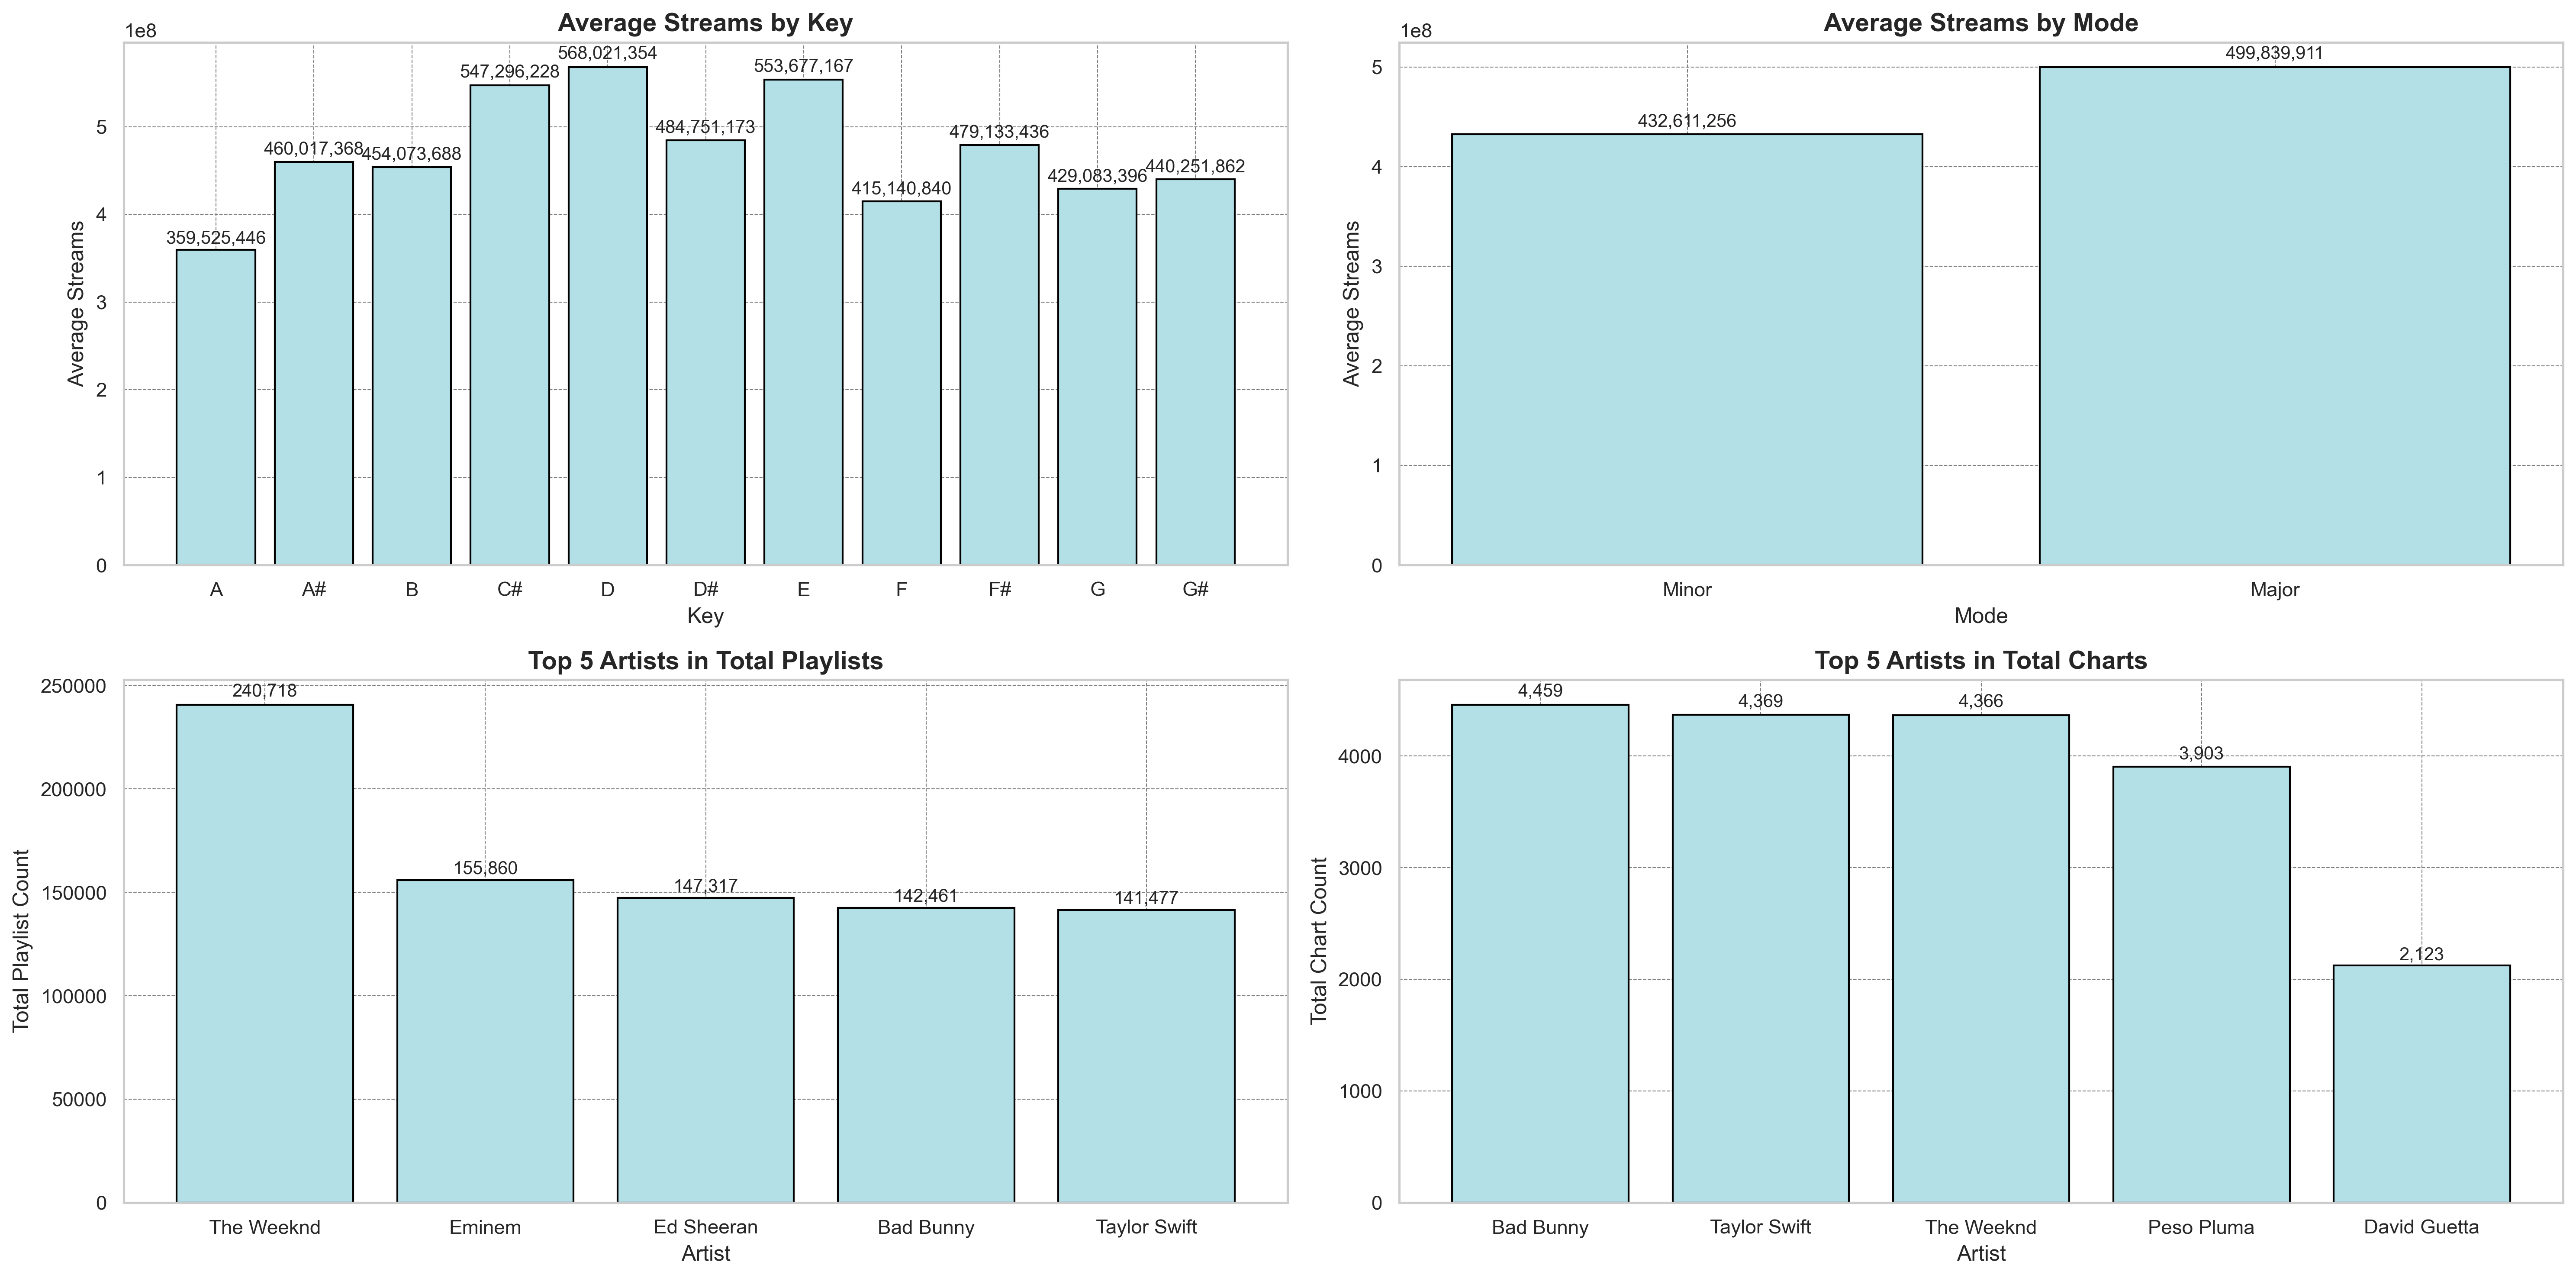

In [1605]:
# Filter out rows where the 'key' value is 'unknown' to only include known musical keys
filtered_spotify_data_by_key = spotify_data_cleaned[spotify_data_cleaned['key'].str.lower() != 'unknown']

# Calculate the average streams per musical key and sort by key for ordered plotting (using filtered data)
average_streams_by_key = filtered_spotify_data_by_key.groupby('key')['streams'].mean().sort_index()

# Calculate the average streams by mode and sort in ascending order for easier comparison (using unfiltered data)
average_streams_by_mode = spotify_data_cleaned.groupby('mode')['streams'].mean().sort_values()

# Split multiple artists listed in 'artist(s)_name' into separate rows and remove any extra whitespace
spotify_data_cleaned['artist(s)_name'] = spotify_data_cleaned['artist(s)_name'].str.split(',')
spotify_data_cleaned = spotify_data_cleaned.explode('artist(s)_name')
spotify_data_cleaned['artist(s)_name'] = spotify_data_cleaned['artist(s)_name'].str.strip()

# Calculate the total count of playlists across all platforms for each track
spotify_data_cleaned['total_playlists'] = (spotify_data_cleaned['in_spotify_playlists'] + 
                                           spotify_data_cleaned['in_apple_playlists'] +
                                           spotify_data_cleaned['in_deezer_playlists'])

# Calculate the total count of chart appearances across all platforms for each track
spotify_data_cleaned['total_charts'] = (spotify_data_cleaned['in_spotify_charts'] + 
                                        spotify_data_cleaned['in_apple_charts'] + 
                                        spotify_data_cleaned['in_deezer_charts'] + 
                                        spotify_data_cleaned['in_shazam_charts'])

# Get the top 5 artists with the most playlist appearances
top_artists_playlists = spotify_data_cleaned.groupby('artist(s)_name')['total_playlists'].sum().nlargest(5)

# Get the top 5 artists with the most chart appearances
top_artists_charts = spotify_data_cleaned.groupby('artist(s)_name')['total_charts'].sum().nlargest(5)

# Set up a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10), dpi=300)

# Plot the average streams by key with labels and grid styling
axes[0, 0].bar(average_streams_by_key.index, average_streams_by_key.values, color=pastel_color, edgecolor='black')
axes[0, 0].set_title('Average Streams by Key', fontsize=14, fontweight='semibold')
axes[0, 0].set_xlabel('Key', fontsize=12)
axes[0, 0].set_ylabel('Average Streams', fontsize=12)
axes[0, 0].grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

# Add value labels above each bar in the 'Average Streams by Key' plot
for i, v in enumerate(average_streams_by_key):
    axes[0, 0].text(i, v + (0.01 * v), f"{v:,.0f}", ha='center', va='bottom', fontsize=10)

# Plot the average streams by mode with labels and grid styling
axes[0, 1].bar(average_streams_by_mode.index, average_streams_by_mode.values, color=pastel_color, edgecolor='black')
axes[0, 1].set_title('Average Streams by Mode', fontsize=14, fontweight='semibold')
axes[0, 1].set_xlabel('Mode', fontsize=12)
axes[0, 1].set_ylabel('Average Streams', fontsize=12)
axes[0, 1].grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

# Add value labels above each bar in the 'Average Streams by Mode' plot
for i, v in enumerate(average_streams_by_mode):
    axes[0, 1].text(i, v + (0.01 * v), f"{v:,.0f}", ha='center', va='bottom', fontsize=10)

# Plot the top 5 artists by playlist appearances with labels and grid styling
axes[1, 0].bar(top_artists_playlists.index, top_artists_playlists.values, color=pastel_color, edgecolor='black')
axes[1, 0].set_title('Top 5 Artists in Total Playlists', fontsize=14, fontweight='semibold')
axes[1, 0].set_xlabel('Artist', fontsize=12)
axes[1, 0].set_ylabel('Total Playlist Count', fontsize=12)
axes[1, 0].grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

# Add value labels above each bar in the 'Top 5 Artists in Total Playlists' plot
for i, v in enumerate(top_artists_playlists):
    axes[1, 0].text(i, v + (0.01 * v), f"{v:,.0f}", ha='center', va='bottom', fontsize=10)

# Plot the top 5 artists by chart appearances with labels and grid styling
axes[1, 1].bar(top_artists_charts.index, top_artists_charts.values, color=pastel_color, edgecolor='black')
axes[1, 1].set_title('Top 5 Artists in Total Charts', fontsize=14, fontweight='semibold')
axes[1, 1].set_xlabel('Artist', fontsize=12)
axes[1, 1].set_ylabel('Total Chart Count', fontsize=12)
axes[1, 1].grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

# Add value labels above each bar in the 'Top 5 Artists in Total Charts' plot
for i, v in enumerate(top_artists_charts):
    axes[1, 1].text(i, v + (0.01 * v), f"{v:,.0f}", ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent overlap and display the final plot
plt.tight_layout()
plt.show()